In [1]:
from hybridpy.learning import dynamicprogramming
from hybridpy.dataset import triploader
from hybridpy.models import batteries, vehicles
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [2]:
%matplotlib inline

In [13]:
# Supercapacitor - battery setup for all-electric vehicle
# Cost is current squared on the battery, integrated over time
# Control is battery power,
cc_cf = lambda current, supercap_power, duration_s: (current**2)*duration_s 
bat_controls = [0, 5000, 10000, 20000, 30000]
supercap = batteries.IdealBattery(max_energy_wh=100)
vehicle = vehicles.ElectricCar(battery=batteries.QuadraticBattery())

In [7]:
trip = triploader.load('/Users/astyler/projects/ChargeCarData/thor/thor20100226_0.csv')

/Users/astyler/anaconda/lib/python2.7/site-packages/hybridpy/dataset/triploader.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  trip.Acceleration[0] = 0


In [15]:
v, q, p, d = dynamicprogramming.compute(trip=trip, controls=bat_controls, battery=supercap, vehicle=vehicle, cost_function=cc_cf, soc_states=50)

In [19]:
q[0][25]

array([ 4165148.57074567,  4165135.64829037,  4166306.03513683,
        4172650.73924024,  4185313.14396033])

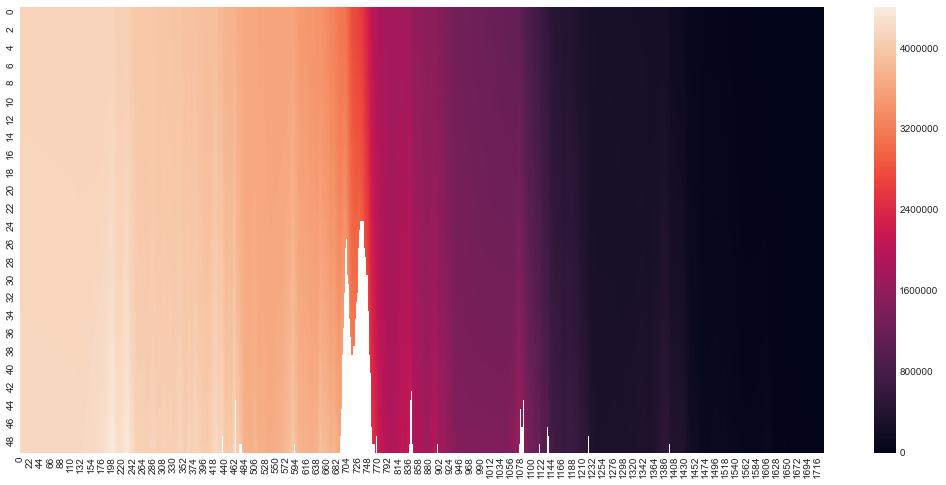

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(v.T[::-1], linewidths=0)#.imshow(v.T[::-1])#cmap='RdBu_r')

In [33]:
ice_controls = [0, 20000, 40000, 60000, 80000]
ice_cf = lambda control, battery_power, duration_s: control * duration
battery = batteries.QuadraticBattery()

In [11]:
x = [1,2,3,4,5]

In [12]:
y = [10,20,30,np.nan, 50]

In [13]:
from scipy.interpolate import interp1d
f = interp1d(x,y, assume_sorted=True)

In [30]:
t=np.random.rand(*v.shape)

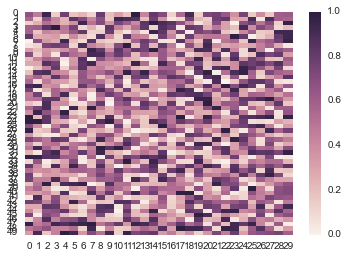

In [34]:
sns.heatmap(np.random.rand(50,30),linewidths=0)

In [16]:
((40000.0/3600)/50.)*100

22.22222222222222